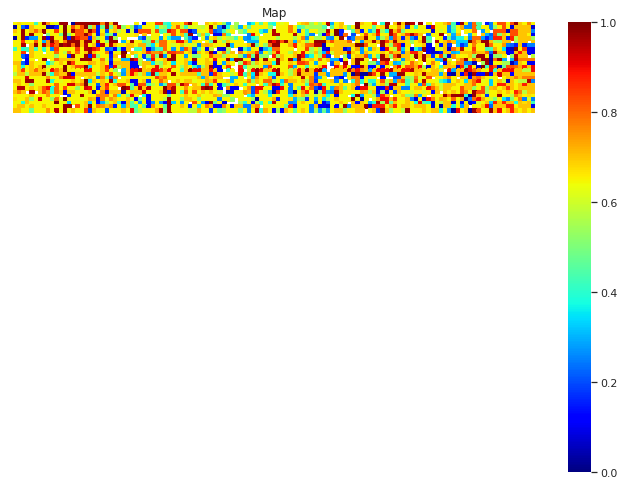

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import sqrt

# configure this
num_dims = 6 # dimensions of descriptor
bin_per_dim = 5 # bins in each descriptor
filename = "archive_741.dat" # text archive you want to present

bin_size = 1 / bin_per_dim
heat = np.empty(bin_per_dim ** num_dims)
heat[:] = np.nan

r,a,b,c,d,e,f,z,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_ = np.loadtxt(filename, unpack=True)

minscore, maxscore = 0, 0

j = 0
for i in r:
    heat[int(i)] = z[j]
    if z[j] > maxscore:
        maxscore = z[j]
    if z[j] < minscore:
        minscore = z[j]
    j += 1

dimxy = int(sqrt(bin_per_dim ** num_dims))

heat = np.reshape(heat, (dimxy, dimxy))

sns.set(rc={'figure.figsize':(11.7,8.27)})

with sns.axes_style("white"): # makes nan values white
    sns.heatmap(heat, mask=np.isnan(heat), vmin=minscore, vmax=maxscore, cmap="jet", xticklabels=False,
               yticklabels=False).set_title("Map")
plt.savefig(filename + ".pdf")
plt.show()

In [31]:
ceil(sqrt(3125))

56

In [27]:
56*56

3136